In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv('/content/drive/MyDrive/datasets/Age_detection_project/age_detection.csv')
df

,file,age,split
0,train/18-20/0.jpg,18-20,train
1,train/18-20/1.jpg,18-20,train
2,train/18-20/2.jpg,18-20,train
3,train/18-20/3.jpg,18-20,train
4,train/18-20/4.jpg,18-20,train
...,...,...,...
145,test/51-60/25.jpg,51-60,test
146,test/51-60/26.jpg,51-60,test
147,test/51-60/27.jpg,51-60,test
148,test/51-60/28.jpg,51-60,test


In [28]:
df.shape

(150, 3)

In [29]:
print(df['file'][0])

train/18-20/0.jpg


In [30]:
import glob
from PIL import Image

images_path = glob.glob('/content/drive/MyDrive/datasets/Age_detection_project/train/**/*.jpg', recursive=True)

X=[]
for path in images_path:
  image = Image.open(path)
  image = image.resize((128,128))
  image = np.array(image)
  X.append(np.array(image))

X = np.array(X)
X

array([[[[144, 131, 120],
         [144, 132, 121],
         [144, 130, 119],
         ...,
         [ 90,  72,  56],
         [ 89,  69,  52],
         [ 88,  68,  51]],

        [[145, 133, 123],
         [143, 132, 121],
         [142, 131, 121],
         ...,
         [ 87,  70,  53],
         [ 90,  72,  55],
         [ 87,  68,  51]],

        [[144, 134, 123],
         [143, 133, 122],
         [142, 132, 121],
         ...,
         [ 84,  66,  50],
         [ 86,  69,  52],
         [ 82,  65,  49]],

        ...,

        [[ 54,  56,  80],
         [ 59,  61,  84],
         [ 58,  59,  82],
         ...,
         [ 60,  59,  73],
         [ 49,  49,  59],
         [ 49,  47,  58]],

        [[ 54,  56,  81],
         [ 55,  57,  81],
         [ 56,  58,  81],
         ...,
         [ 57,  57,  71],
         [ 49,  48,  58],
         [ 50,  48,  58]],

        [[ 55,  56,  83],
         [ 55,  57,  81],
         [ 56,  59,  82],
         ...,
         [ 50,  48,  61],
        

In [31]:
X.shape

(125, 128, 128, 3)

array([[[210, 202, 182],
        [210, 203, 182],
        [211, 202, 182],
        ...,
        [228, 220, 200],
        [228, 220, 200],
        [228, 220, 200]],

       [[210, 202, 182],
        [210, 202, 182],
        [210, 202, 181],
        ...,
        [228, 220, 200],
        [228, 220, 200],
        [229, 220, 200]],

       [[210, 203, 181],
        [210, 203, 181],
        [210, 203, 181],
        ...,
        [228, 220, 200],
        [228, 220, 198],
        [228, 220, 198]],

       ...,

       [[ 37,  28,  26],
        [ 40,  32,  29],
        [ 29,  21,  20],
        ...,
        [ 71,  52,  36],
        [ 71,  52,  34],
        [ 61,  44,  28]],

       [[ 38,  28,  28],
        [ 31,  22,  23],
        [ 38,  28,  26],
        ...,
        [ 67,  50,  35],
        [ 76,  57,  43],
        [ 56,  39,  26]],

       [[ 31,  25,  25],
        [ 28,  23,  23],
        [ 36,  27,  25],
        ...,
        [ 75,  58,  42],
        [ 73,  55,  40],
        [ 64,  46,  35]]], dtype=uint8)
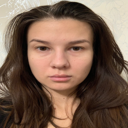

In [32]:
X[45]

In [33]:
# define the function for images_paths_and_labels
def images_paths_and_labels(base_path):
    image_paths = glob.glob(base_path + '/**/*.jpg', recursive=True) # the glob module to recursively search for all .jpg images under base_path
    # ** - looks into all subdirectories and recursive = True helps in enabling that
    X = []
    y = []
    for path in image_paths:
        image = Image.open(path)
        image = image.resize((128,128)) # resizes the image to 128x128 pixels, which helps in standardizing the input images
        X.append(np.array(image))

        label = path.split('/')[-2] # if the path is /dataset/train/18-20/img1.jpg, -2 gets 18-20.
        y.append(label)

    X = np.array(X) / 255.0 # normalize -> [0,1]
    y = np.array(y)
    return X,y

In [34]:
# load train dataset
X_train, y_train = images_paths_and_labels('/content/drive/MyDrive/datasets/Age_detection_project/train')
#load test dataset
X_test, y_test = images_paths_and_labels('/content/drive/MyDrive/datasets/Age_detection_project/test')

In [35]:
X_train.shape, X_test.shape

((125, 128, 128, 3), (25, 128, 128, 3))

In [36]:
type[X_train]

type[array([[[[0.56470588, 0.51372549, 0.47058824],
         [0.56470588, 0.51764706, 0.4745098 ],
         [0.56470588, 0.50980392, 0.46666667],
         ...,
         [0.35294118, 0.28235294, 0.21960784],
         [0.34901961, 0.27058824, 0.20392157],
         [0.34509804, 0.26666667, 0.2       ]],

        [[0.56862745, 0.52156863, 0.48235294],
         [0.56078431, 0.51764706, 0.4745098 ],
         [0.55686275, 0.51372549, 0.4745098 ],
         ...,
         [0.34117647, 0.2745098 , 0.20784314],
         [0.35294118, 0.28235294, 0.21568627],
         [0.34117647, 0.26666667, 0.2       ]],

        [[0.56470588, 0.5254902 , 0.48235294],
         [0.56078431, 0.52156863, 0.47843137],
         [0.55686275, 0.51764706, 0.4745098 ],
         ...,
         [0.32941176, 0.25882353, 0.19607843],
         [0.3372549 , 0.27058824, 0.20392157],
         [0.32156863, 0.25490196, 0.19215686]],

        ...,

        [[0.21176471, 0.21960784, 0.31372549],
         [0.23137255, 0.23921569, 0.3294

In [37]:
X_test.shape,y_test.shape

((25, 128, 128, 3), (25,))

In [38]:
!pip install tensorflow

In [39]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

le = LabelEncoder() # transforms categorical labels (like '18-20', '21-25') into numerical labels (like 0, 1, 2...)
y_train_enc = to_categorical(le.fit_transform(y_train)) # Fits the encoder on y_train i.e., helps to learn all unique class labels from the given dataset
y_test_enc = to_categorical(le.transform(y_test)) # converts the numerical labels into one-hot encoded vectors

In [40]:
print("Train shape:", X_train.shape, y_train_enc.shape)
print("Test shape:", X_test.shape, y_test_enc.shape)

Train shape: (125, 128, 128, 3) (125, 5)
Test shape: (25, 128, 128, 3) (25, 5)


In [41]:
# (125,128,128,3)
# 125 - total no.of images in train data
# 128*128 - image size
# 3 - total number of channels for each image i.e., RGB

In [42]:
import tensorflow as tf
# Sequential model, which stacks layers in order, one after the other.
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu', input_shape= (128,128,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation = 'relu'),
    tf.keras.layers.Dense(y_train_enc.shape[1], activation = 'softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
# convolutional layer 1
# 32,(3,3) - 32 filter size, 3*3 filter size
# activation relu for non linearity
# input size - 128*128
# (n+2p-f / s ) + 1 = (128 + 2*0 - 3 / 1)+1 = 125+1 = 126
# so the output fuction will be of size (126,126,3)

# max pooling
# reduces the spatial size by half - helps in downsampling
# output - (63,63,3)

# convolutional layer 2
# 64,(3,3) - 64 filter size, 3*3 filter size
# (n+2p-f / s ) + 1 - (63+2*0-3)/1+1 = 60+1 = 61
# so the output fuction will be of size (61,61,3)

# max pooling
# reduces to (30, 30, 64)

# Flatten()
# flattens 3D feature maps into 1D vector: 30 × 30 × 64 = 57600

# Dense layer
# fully connected layer with 128 neurons

In [44]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy']
              )

In [45]:
history = model.fit(X_train, y_train_enc, epochs=10, batch_size=32, validation_data=(X_test, y_test_enc))

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.1252 - loss: 4.2495 - val_accuracy: 0.2000 - val_loss: 2.2358
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.2037 - loss: 2.1713 - val_accuracy: 0.2000 - val_loss: 1.6217
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.2753 - loss: 1.5760 - val_accuracy: 0.1600 - val_loss: 1.6137
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 836ms/step - accuracy: 0.4625 - loss: 1.4983 - val_accuracy: 0.2400 - val_loss: 1.6336
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 802ms/step - accuracy: 0.6672 - loss: 1.3408 - val_accuracy: 0.1200 - val_loss: 1.6721
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 791ms/step - accuracy: 0.7448 - loss: 1.0947 - val_accuracy: 0.1200 - val_loss: 1.8164
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 795ms/step - accuracy: 0.7539 - loss: 0.8313 - val_accuracy: 0.1600 - val_loss: 1.8819
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.8085 - loss: 0.6097 - val_accuracy: 0.1200 - val_loss: 2.0227
Epo

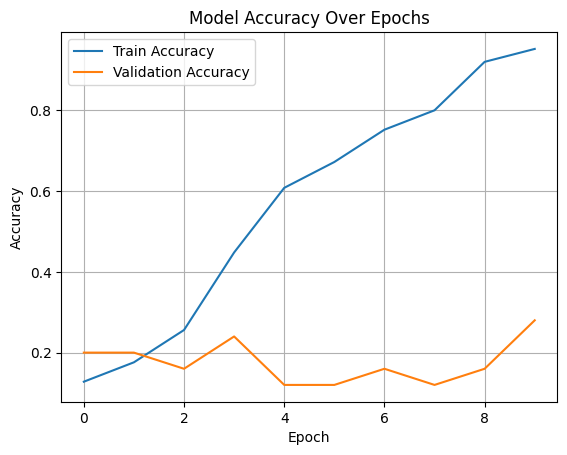

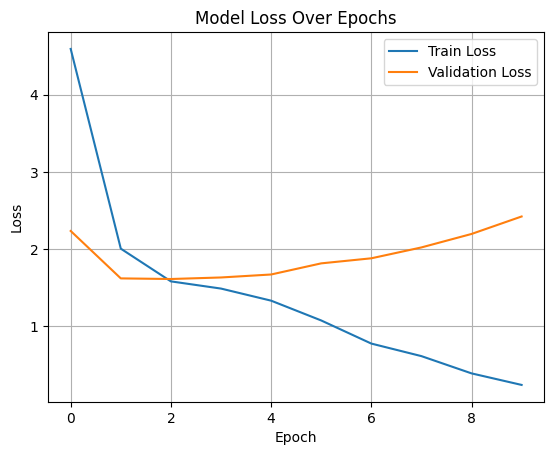

In [46]:
import matplotlib.pyplot as plt

# Accuracy Plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss Plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
